In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


DATA preparation

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df['Description'] = df['Description'].str.strip()
df = df[df['Description']!= 'POSTAGE']
 
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
 
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

df = df[df['Description'].str.startswith('?')!=True]
df.shape


(531428, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531428.000000,531428.000000,396825.000000
mean,10.275836,3.790413,15301.354595
std,159.551926,40.242194,1709.881541
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16801.000000
max,80995.000000,13541.330000,18287.000000


<AxesSubplot:>

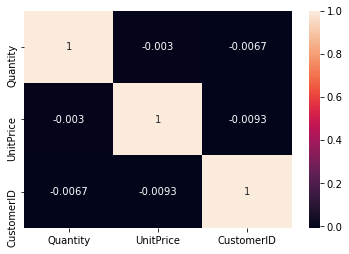

In [6]:
sns.heatmap(df.corr(),annot = True)

In [7]:
def missing_values(x):
    print(x.isna().sum())
    print("*"*50)
    print('Percentage of missing values is')
    print(x.isnull().sum()*100/len(x))

    
missing_values(df)
    

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134603
Country             0
dtype: int64
**************************************************
Percentage of missing values is
InvoiceNo       0.000000
StockCode       0.000000
Description     0.273791
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.328549
Country         0.000000
dtype: float64


In [8]:
df = df.drop(columns = 'CustomerID')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529973 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    529973 non-null  object        
 1   StockCode    529973 non-null  object        
 2   Description  529973 non-null  object        
 3   Quantity     529973 non-null  int64         
 4   InvoiceDate  529973 non-null  datetime64[ns]
 5   UnitPrice    529973 non-null  float64       
 6   Country      529973 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.3+ MB


In [10]:
data = df[df['Quantity']>=0]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529561 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    529561 non-null  object        
 1   StockCode    529561 non-null  object        
 2   Description  529561 non-null  object        
 3   Quantity     529561 non-null  int64         
 4   InvoiceDate  529561 non-null  datetime64[ns]
 5   UnitPrice    529561 non-null  float64       
 6   Country      529561 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.3+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


Next step is to check whether the data has duplicate values

In [11]:
def duplicate(x):
    print(x.duplicated().sum())
    

duplicate(data)

5231


We have found that there are 5231 duplicates available in the entire dataset. hence, eliminating it

In [12]:
data = data.drop_duplicates()
duplicate(data)

0


Filtering the country only UK since the question asked in the assesment is,
Split the data according to the region of transaction (creation of a basket) 

In [13]:
UK = (data[data['Country']== 'United Kingdom']).groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
GER= (data[data['Country']== 'Germany']).groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
FR = (data[data['Country']== 'France']).groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [14]:
UK.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def encode_values(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
UK_basket = UK.applymap(encode_values)
GER_basket = GER.applymap(encode_values)
FR_basket = FR.applymap(encode_values)

In [16]:
UK_basket_filter = UK_basket[(UK_basket>0).sum(axis =1)>=2]
GER_basket_filter = GER_basket[(GER_basket>0).sum(axis =1)>=2]
FR_basket_filter = FR_basket[(FR_basket>0).sum(axis =1)>=2]

In [17]:
UK_frequency = apriori(UK_basket_filter, min_support = 0.03, use_colnames = True).sort_values('support', ascending ='False').reset_index(drop = True)
RULES_UK = association_rules(UK_frequency, metric ='lift', min_threshold =1).sort_values('lift', ascending = False).reset_index(drop = True)
RULES_UK

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.042284,0.056500,0.034904,0.825465,14.610023,0.032515,5.405792
1,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.056500,0.042284,0.034904,0.617773,14.610023,0.032515,2.505621
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.042284,0.057710,0.033029,0.781116,13.535248,0.030589,4.304973
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.057710,0.042284,0.033029,0.572327,13.535248,0.030589,2.239365
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.045309,0.054262,0.032726,0.722296,13.311351,0.030268,3.405567
5,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.054262,0.045309,0.032726,0.603122,13.311351,0.030268,2.405500
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.056500,0.057710,0.042405,0.750535,13.005345,0.039145,3.777249
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.057710,0.056500,0.042405,0.734801,13.005345,0.039145,3.557704
8,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.056197,0.052689,0.034057,0.606028,11.502008,0.031096,2.404514
9,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.052689,0.056197,0.034057,0.646383,11.502008,0.031096,2.669000


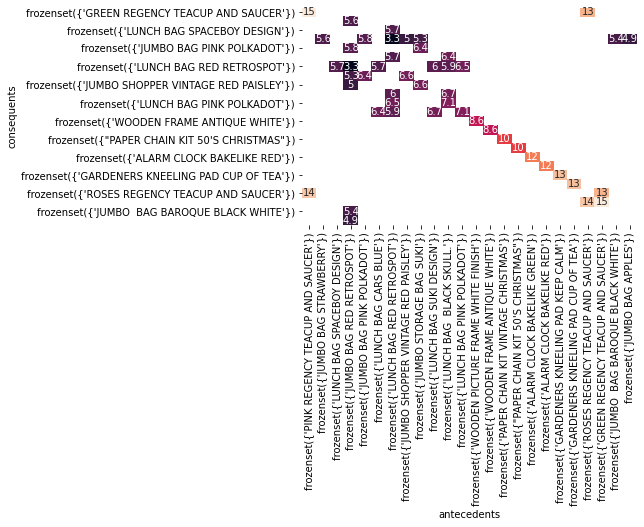

In [18]:
pivot = RULES_UK.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [19]:
frequency_GER = apriori(GER_basket_filter, min_support = 0.03, use_colnames = True).sort_values('support', ascending ='False').reset_index(drop = True)
RULES_GER = association_rules(frequency_GER, metric ='lift', min_threshold =1).sort_values('lift', ascending = False).reset_index(drop = True)
RULES_GER

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.044496,0.046838,0.039813,0.894737,19.102632,0.037729,9.055035
1,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.046838,0.044496,0.039813,0.850000,19.102632,0.037729,6.370023
2,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.056206,0.035129,0.030445,0.541667,15.419444,0.028471,2.105174
3,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.035129,0.056206,0.030445,0.866667,15.419444,0.028471,7.078454
4,(SET OF 12 FAIRY CAKE BAKING CASES),(SET OF 12 MINI LOAF BAKING CASES),0.044496,0.044496,0.030445,0.684211,15.376731,0.028465,3.025761
...,...,...,...,...,...,...,...,...,...
239,(REGENCY CAKESTAND 3 TIER),(PLASTERS IN TIN WOODLAND ANIMALS),0.147541,0.147541,0.030445,0.206349,1.398589,0.008677,1.074098
240,(6 RIBBONS RUSTIC CHARM),(ROUND SNACK BOXES SET OF4 WOODLAND),0.110070,0.262295,0.037471,0.340426,1.297872,0.008600,1.118456
241,(ROUND SNACK BOXES SET OF4 WOODLAND),(6 RIBBONS RUSTIC CHARM),0.262295,0.110070,0.037471,0.142857,1.297872,0.008600,1.038251
242,(REGENCY CAKESTAND 3 TIER),(ROUND SNACK BOXES SET OF4 WOODLAND),0.147541,0.262295,0.042155,0.285714,1.089286,0.003455,1.032787


In [34]:
frequency_FR = apriori(FR_basket_filter, min_support = 0.03, use_colnames = True).sort_values('support', ascending ='False').reset_index(drop = True)
RULES_FR = association_rules(frequency_FR, metric ='lift', min_threshold =1).sort_values('lift', ascending = False).reset_index(drop = True)
RULES_FR

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.030055,0.035519,0.030055,1.000000,28.153846,0.028987,inf
1,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...",0.035519,0.030055,0.030055,0.846154,28.153846,0.028987,6.304645
2,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.032787,0.035519,0.030055,0.916667,25.807692,0.028890,11.573770
3,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...",0.035519,0.032787,0.030055,0.846154,25.807692,0.028890,6.286885
4,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.032787,0.035519,0.030055,0.916667,25.807692,0.028890,11.573770
...,...,...,...,...,...,...,...,...,...
1813,(RABBIT NIGHT LIGHT),(RED RETROSPOT MINI CASES),0.196721,0.147541,0.032787,0.166667,1.129630,0.003762,1.022951
1814,(LUNCH BAG RED RETROSPOT),(PLASTERS IN TIN CIRCUS PARADE),0.163934,0.180328,0.032787,0.200000,1.109091,0.003225,1.024590
1815,(PLASTERS IN TIN CIRCUS PARADE),(LUNCH BAG RED RETROSPOT),0.180328,0.163934,0.032787,0.181818,1.109091,0.003225,1.021858
1816,(LUNCH BAG RED RETROSPOT),(RABBIT NIGHT LIGHT),0.163934,0.196721,0.035519,0.216667,1.101389,0.003270,1.025462


In [35]:
RULES_UK[(RULES_UK['support']>= 0.04) & (RULES_UK['confidence']>=0.08)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.056500,0.057710,0.042405,0.750535,13.005345,0.039145,3.777249,1
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.057710,0.056500,0.042405,0.734801,13.005345,0.039145,3.557704,1
30,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.116327,0.069990,0.047487,0.408216,5.832519,0.039345,1.571538,1
31,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.069990,0.116327,0.047487,0.678479,5.832519,0.039345,2.748413,1
40,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.116327,0.068356,0.042224,0.362975,5.310028,0.034272,1.462490,1
41,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.068356,0.116327,0.042224,0.617699,5.310028,0.034272,2.311460,1


In [36]:
RULES_GER[(RULES_GER['support']>= 0.04) & (RULES_GER['confidence']>=0.08)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
6,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.053864,0.051522,0.042155,0.782609,15.189723,0.039379,4.362998,1
7,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.051522,0.053864,0.042155,0.818182,15.189723,0.039379,5.203747,1
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.060890,0.053864,0.049180,0.807692,14.994983,0.045901,4.919906,1
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.053864,0.060890,0.049180,0.913043,14.994983,0.045901,10.799766,1
46,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.135831,0.074941,0.063232,0.465517,6.211746,0.053052,1.730755,1
...,...,...,...,...,...,...,...,...,...,...
225,(RED TOADSTOOL LED NIGHT LIGHT),(ROUND SNACK BOXES SET OF4 WOODLAND),0.103044,0.262295,0.049180,0.477273,1.819602,0.022152,1.411262,1
230,(PLASTERS IN TIN SPACEBOY),(ROUND SNACK BOXES SET OF4 WOODLAND),0.114754,0.262295,0.051522,0.448980,1.711735,0.021423,1.338798,1
231,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.262295,0.114754,0.051522,0.196429,1.711735,0.021423,1.101639,1
242,(REGENCY CAKESTAND 3 TIER),(ROUND SNACK BOXES SET OF4 WOODLAND),0.147541,0.262295,0.042155,0.285714,1.089286,0.003455,1.032787,1


In [37]:
RULES_FR[(RULES_FR['support']>= 0.04) & (RULES_FR['confidence']>=0.08)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
162,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.049180,0.043716,0.040984,0.833333,19.062500,0.038834,5.737705
163,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.043716,0.049180,0.040984,0.937500,19.062500,0.038834,15.213115
286,(DOLLY GIRL CHILDRENS BOWL),(SPACEBOY CHILDRENS BOWL),0.049180,0.054645,0.043716,0.888889,16.266667,0.041028,8.508197
287,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.054645,0.049180,0.043716,0.800000,16.266667,0.041028,4.754098
306,(PACK OF 6 SKULL PAPER PLATES),"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...",0.060109,0.043716,0.040984,0.681818,15.596591,0.038356,3.005464
...,...,...,...,...,...,...,...,...,...
1797,(PLASTERS IN TIN CIRCUS PARADE),(RABBIT NIGHT LIGHT),0.180328,0.196721,0.043716,0.242424,1.232323,0.008242,1.060328
1798,(ROUND SNACK BOXES SET OF4 WOODLAND),(RABBIT NIGHT LIGHT),0.169399,0.196721,0.040984,0.241935,1.229839,0.007659,1.059644
1799,(RABBIT NIGHT LIGHT),(ROUND SNACK BOXES SET OF4 WOODLAND),0.196721,0.169399,0.040984,0.208333,1.229839,0.007659,1.049180
1810,(PLASTERS IN TIN WOODLAND ANIMALS),(RABBIT NIGHT LIGHT),0.183060,0.196721,0.040984,0.223881,1.138060,0.004972,1.034994


In [38]:
RULES_UK['length']= RULES_UK['antecedents'].apply(lambda x:len(x))
RULES_UK[RULES_UK['length']>1].sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length


In [39]:
RULES_FR['length']= RULES_FR['antecedents'].apply(lambda x:len(x))

RULES_FR[RULES_FR['length']>1].sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.030055,0.035519,0.030055,1.000000,28.153846,0.028987,inf,2
1,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...",0.035519,0.030055,0.030055,0.846154,28.153846,0.028987,6.304645,2
2,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.032787,0.035519,0.030055,0.916667,25.807692,0.028890,11.573770,3
5,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...",0.035519,0.032787,0.030055,0.846154,25.807692,0.028890,6.286885,3
3,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...",0.035519,0.032787,0.030055,0.846154,25.807692,0.028890,6.286885,3


In [40]:
RULES_GER['length']= RULES_GER['antecedents'].apply(lambda x:len(x))

RULES_GER[RULES_GER['length']>1].sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
34,"(ROUND SNACK BOXES SET OF4 WOODLAND, RED RETRO...",(WOODLAND CHARLOTTE BAG),0.032787,0.135831,0.032787,1.000000,7.362069,0.028333,inf,2
43,"(ROUND SNACK BOXES SET OF4 WOODLAND, WOODLAND ...",(RED RETROSPOT CHARLOTTE BAG),0.067916,0.074941,0.032787,0.482759,6.441810,0.027697,1.788447,2
56,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",(PLASTERS IN TIN WOODLAND ANIMALS),0.051522,0.147541,0.037471,0.727273,4.929293,0.029869,3.125683,2
57,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",(PLASTERS IN TIN WOODLAND ANIMALS),0.051522,0.147541,0.037471,0.727273,4.929293,0.029869,3.125683,2
60,"(ROUND SNACK BOXES SET OF4 WOODLAND, LUNCH BOX...",(ROUND SNACK BOXES SET OF 4 FRUITS),0.037471,0.168618,0.030445,0.812500,4.818576,0.024127,4.434036,2
63,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...",(PLASTERS IN TIN CIRCUS PARADE),0.051522,0.124122,0.030445,0.590909,4.760720,0.024050,2.141036,2
64,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...",(PLASTERS IN TIN WOODLAND ANIMALS),0.060890,0.147541,0.042155,0.692308,4.692308,0.033171,2.770492,2
67,"(CHARLOTTE BAG APPLES DESIGN, ROUND SNACK BOXE...",(ROUND SNACK BOXES SET OF 4 FRUITS),0.042155,0.168618,0.032787,0.777778,4.612654,0.025679,3.741218,2
69,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...",(PLASTERS IN TIN CIRCUS PARADE),0.065574,0.124122,0.037471,0.571429,4.603774,0.029332,2.043716,2
72,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",(PLASTERS IN TIN SPACEBOY),0.072600,0.114754,0.037471,0.516129,4.497696,0.029140,1.829508,2
